In [20]:
# needed imports
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
import numpy as np
import pandas as pd
 
#Import Data, droping Summe and ID
X = pd.read_excel("./Data with time stemps reduced.xlsx", "Matrix without time").drop(columns=['Summe', 'ID'])
Y = pd.read_excel("./Data with time stemps reduced.xlsx", "Matrix randomisiert").drop(columns=['ID']) 
X2 = X.transpose()
software = list(X.columns)
Y

,S0052,S0088,S0520,S0109,S0048,S0448,S0263,S0512,S0100,S0227,...,S0379,S0570,S0389,S0115,S0280,S0217,S0037,S0284,S0187,S0458
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


values passed to leaf_label_func
leaves :  [116, 187, 236, 237, 240, 136, 81, 171, 17, 50, 140, 197, 134, 131, 163, 231, 61, 194, 225, 121, 219, 260, 89, 266, 122, 223, 45, 221, 14, 126, 172, 37, 229, 31, 130, 128, 129, 109, 54, 85, 248, 251, 252, 230, 5, 228, 11, 253, 2, 86, 3, 113, 149, 161, 91, 112, 43, 125, 205, 147, 66, 135, 57, 200, 63, 143, 22, 47, 211, 262, 142, 148, 9, 180, 185, 176, 209, 111, 145, 246, 67, 79, 98, 146, 150, 264, 213, 210, 256, 117, 114, 97, 53, 82, 222, 87, 58, 123, 242, 65, 250, 157, 71, 92, 164, 77, 102, 244, 202, 88, 234, 247, 100, 33, 36, 127, 52, 133, 154, 155, 12, 27, 38, 44, 93, 29, 34, 119, 151, 118, 227, 267, 107, 83, 84, 59, 1, 56, 35, 103, 235, 124, 99, 101, 165, 169, 96, 64, 207, 195, 186, 110, 104, 72, 90, 173, 7, 263, 233, 238, 232, 191, 193, 139, 108, 28, 51, 40, 217, 166, 168, 41, 212, 39, 178, 73, 75, 174, 74, 21, 189, 68, 198, 192, 137, 220, 199, 6, 26, 13, 258, 196, 203, 206, 257, 4, 177, 105, 170, 16, 15, 215, 49, 184, 255, 183, 254, 62, 9

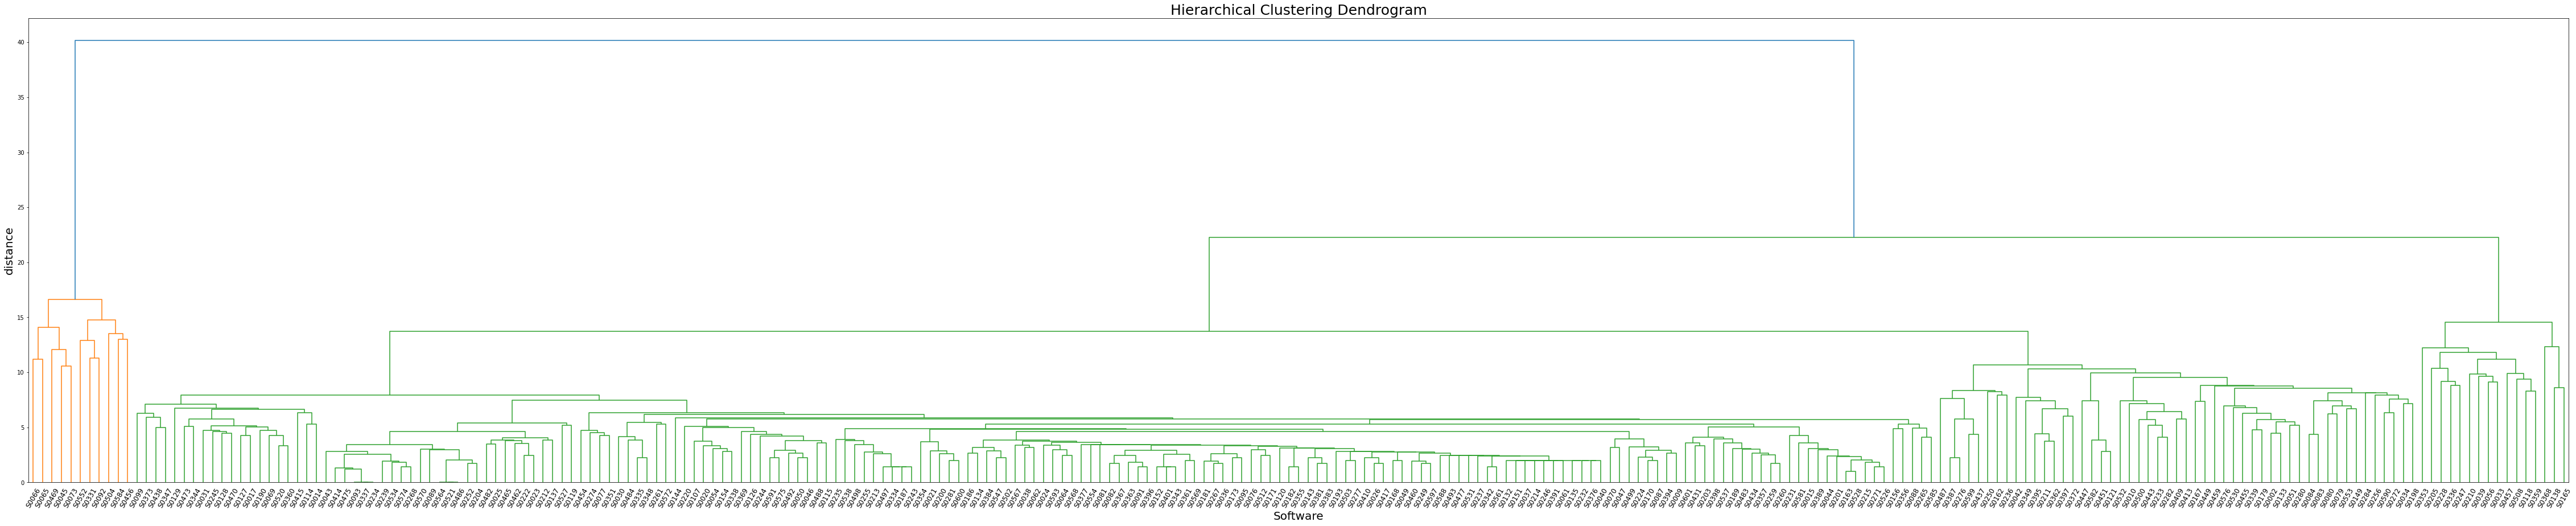

In [35]:
linked = sch.linkage(Y, 'ward')
#labels = ["A", "B", "C", "D"]
labels = software

p = len(labels)

plt.figure(figsize=(80, 15))
plt.title('Hierarchical Clustering Dendrogram', fontsize=25)
plt.xlabel('Software', fontsize=20)
plt.ylabel('distance', fontsize=20)

# call dendrogram to get the returned dictionary 
# (plotting parameters can be ignored at this point)
R = sch.dendrogram(
                linked,
                truncate_mode='lastp',  # show only the last p merged clusters
                p=p,  # show only the last p merged clusters
                no_plot=True,
                )


print("values passed to leaf_label_func\nleaves : ", R["leaves"])

# create a label dictionary
temp = {R["leaves"][ii]: labels[ii] for ii in range(len(R["leaves"]))}
def llf(xx):
    return "{}".format(temp[xx])

## This version gives you your label AND the count
# temp = {R["leaves"][ii]:(labels[ii], R["ivl"][ii]) for ii in range(len(R["leaves"]))}
# def llf(xx):
#     return "{} - {}".format(*temp[xx])


sch.dendrogram(
            linked,
            truncate_mode='lastp',  # show only the last p merged clusters
            p=p,  # show only the last p merged clusters
            leaf_label_func=llf,
            leaf_rotation=60.,
            leaf_font_size=12.,
            show_contracted=True,  # to get a distribution impression in truncated branches
            )

plt.show()